In [1]:
#Importing functions
from __future__ import absolute_import, division, print_function, unicode_literals
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVR, SVC
from sklearn.utils import resample
from sklearn.feature_selection import SelectKBest, f_classif
%matplotlib inline


In [2]:
import statsmodels.api as sm
from sklearn import ensemble
from sklearn import datasets
from sklearn import linear_model
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from IPython.display import Image
from sklearn import ensemble
from sklearn import tree


In [3]:
import pydotplus
from scipy import stats
from math import sqrt
from scipy.stats import ttest_ind
from scipy.stats import ks_2samp
from sklearn.model_selection import cross_val_score
import timeit
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import my data
df = pd.read_csv('C:\\Users\\Square Bear\\Documents\\Thinkful\\Datasets\\heart.csv')
pd.options.display.max_columns = None
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Observing basic statistics
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Text(0.5, 1.0, 'Histogram of Age')

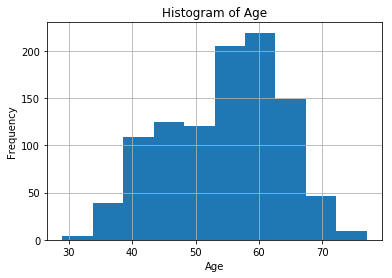

In [8]:
#Histogram of Age
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

## The mean age is 54 while the histogram shows most patients in this study are in their 50s and 60s. 

Text(0.5, 1.0, 'Histogram of Chest Pain Type')

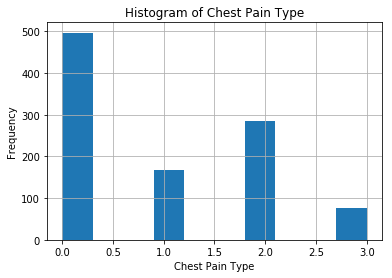

In [9]:
#Histogram of Chest Pain
df['cp'].hist()
plt.xlabel('Chest Pain Type')
plt.ylabel('Frequency')
plt.title('Histogram of Chest Pain Type')

## Most patients experience only 1 type of chest pain.

Text(0.5, 1.0, 'Histogram of Resting Blood Pressure')

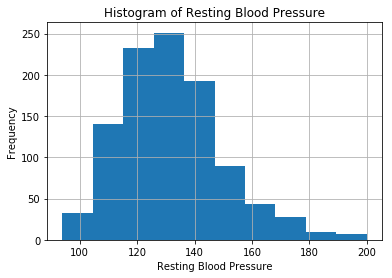

In [10]:
#Histogram of Resting Blood Pressure
df['trestbps'].hist()
plt.xlabel('Resting Blood Pressure')
plt.ylabel('Frequency')
plt.title('Histogram of Resting Blood Pressure')

## The histogram is skewed to the right where most patients had lower resting blood pressure.

Text(0.5, 1.0, 'Histogram of Serum Cholesterol')

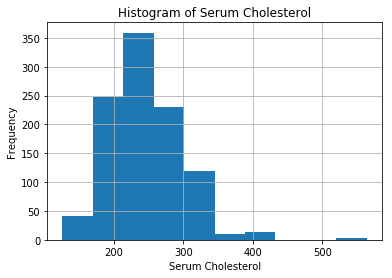

In [11]:
#Histogram of Cholesterol
df['chol'].hist()
plt.xlabel('Serum Cholesterol')
plt.ylabel('Frequency')
plt.title('Histogram of Serum Cholesterol')

## This histogream is skewed to the right indicating that most patients had lower cholesterol. 

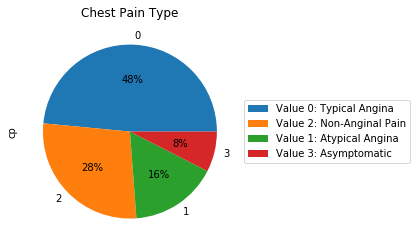

In [12]:
#Pie Chart of the types of Chest Pain
df['cp'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Chest Pain Type')

labels = ['Value 0: Typical Angina ', 'Value 2: Non-Anginal Pain','Value 1: Atypical Angina', 'Value 3: Asymptomatic ']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))


## The above pie chart shows that 48% of patients in the study experience a typical angina chest pain. 28% experience a non-anginal pain and 16% experience atypical angina pain. However, 8% are asymptomatic which means they do not experience pain at all.

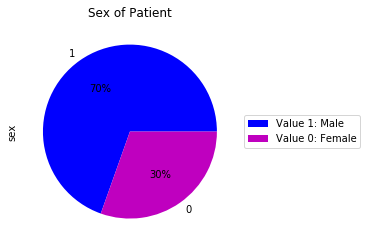

In [13]:
#Pie Chart of Male and Female Patients
df['sex'].value_counts().plot(kind='pie', autopct='%1.0f%%', colors='bm')
plt.title('Sex of Patient')

labels = ['Value 1: Male ', 'Value 0: Female']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))


## The above pie chart shows that this data was split 70/30 male to female.

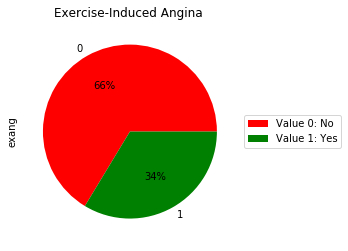

In [14]:
#Pie Chart of whether the patient experiences angina pain
df['exang'].value_counts().plot(kind='pie', autopct='%1.0f%%',colors='rg')
plt.title('Exercise-Induced Angina ')

labels = ['Value 0: No ', 'Value 1: Yes']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))


## 34% of the patients experienced angina pain from exercising.

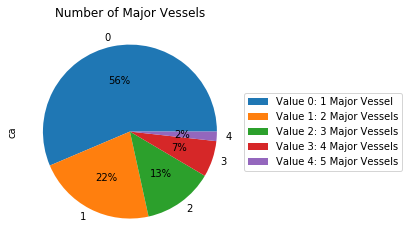

In [15]:
#Pie Chart of how many vessels are involved in heart disease
df['ca'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Number of Major Vessels')

labels = ['Value 0: 1 Major Vessel ', 'Value 1: 2 Major Vessels', 'Value 2: 3 Major Vessels','Value 3: 4 Major Vessels', 'Value 4: 5 Major Vessels']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))


## Patients who have heart disease shows how many major blood vessels are colored by fluoroscopy. It is unclear if that one blood vessel is the same blood vessel in each instance. 

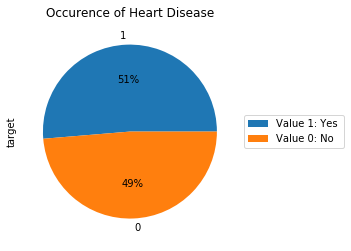

In [16]:
#Pie Chart of how many patients experience heart disease
df['target'].value_counts().plot(kind='pie', autopct='%1.0f%%')
plt.title('Occurence of Heart Disease')

labels = ['Value 1: Yes ', 'Value 0: No']
plt.legend(labels,loc='center left', bbox_to_anchor=(1, 0.5))


## 51% of the patients in the study have heart disease.

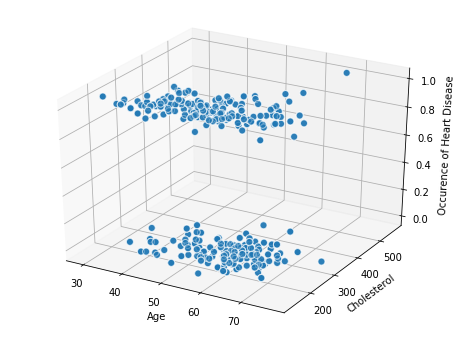

In [17]:
#3D Scatterplot of Age, Cholestorol, and Heart Disease
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['age']
ys = df['chol']
zs = df['target']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Occurence of Heart Disease')

plt.show()

## The intersection between age and cholesterol seems to span across the ages. It also looks like the patients are evenly distributed between having heart disease and those without heart disease.

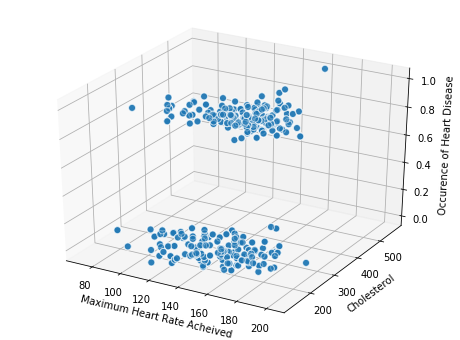

In [18]:
#3D Scatterplot of Maximum Heart Rate, Cholesterol, and Heart Disease
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['thalach']
ys = df['chol']
zs = df['target']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Maximum Heart Rate Acheived')
ax.set_ylabel('Cholesterol')
ax.set_zlabel('Occurence of Heart Disease')

plt.show()

## The maximum heart rate is evenly distributed between those with heart disease and those patients without heart disease.

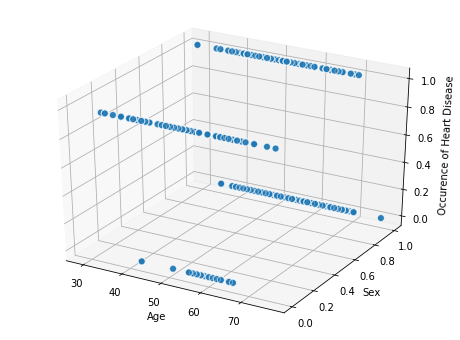

In [19]:
#3D Scatterplot of Age, Sex, and Heart Disease
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

xs = df['age']
ys = df['sex']
zs = df['target']
ax.scatter(xs, ys, zs, s=50, alpha=0.6, edgecolors='w')

ax.set_xlabel('Age')
ax.set_ylabel('Sex')
ax.set_zlabel('Occurence of Heart Disease')

plt.show()

## There is a small number of women who do not have heart disease but there are a smaller number of women in this study. The age of patients are concentrated in the 50s and 60s. 

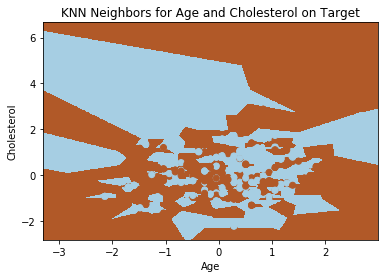

In [20]:
#K Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
from scipy import stats

neighbors = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Our input data frame will be the z-scores this time instead of raw data.
X = pd.DataFrame({
    'age': stats.zscore(df.age),
    'chol': stats.zscore(df.chol)
})

# Fit our model.
Y = df['target']
neighbors.fit(X, Y)

# Arrays, not data frames, for the mesh.
X = np.array(X)
Y = np.array(Y)

# Mesh size.
h = .01

# Plot the decision boundary. We assign a color to each point in the mesh.
x_min = X[:,0].min() - .5
x_max = X[:,0].max() + .5
y_min = X[:,1].min() - .5
y_max = X[:,1].max() + .5
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

# Add the training points to the plot.
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.title('KNN Neighbors for Age and Cholesterol on Target')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()



## The blue areas of the K Neighbors Classifier graph refer to patients that have heart disease along with a correlation with age and cholesterol. 

In [21]:
#Random Forest Cross-Validation Score
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

rfc = ensemble.RandomForestClassifier()
X = df.drop('target', 1)
Y = df['target'].values
X = pd.get_dummies(X)
X = X.dropna(axis=1)

cross_val_score(rfc, X, Y, cv=10)

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.97058824, 0.98019802])

## Random Forest shows the testing data has 100% cross validation. 

In [22]:
#Decision Tree Classifier
start_time = timeit.default_timer()

for i in range(1,11,1):
    decision_tree = tree.DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    X = df.drop('target', 1)
    Y = df['target'].values
    decision_tree.fit(X,Y)

    dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X.columns, class_names=['Good', 'Bad'], filled=True)
    graph = pydotplus.graph_from_dot_data(dot_data)
    Image(graph.create_png())
    print('Decision Tree Depth: {}'.format(i))
    print('Model Performance: {:.2%}.\n'.format(cross_val_score(decision_tree, X, Y, cv=10).mean()))

print("--- Runtime: %s seconds. ---" % (timeit.default_timer() - start_time))

Decision Tree Depth: 1
Model Performance: 75.99%.

Decision Tree Depth: 2
Model Performance: 73.07%.

Decision Tree Depth: 3
Model Performance: 83.02%.

Decision Tree Depth: 4
Model Performance: 84.29%.

Decision Tree Depth: 5
Model Performance: 89.75%.

Decision Tree Depth: 6
Model Performance: 94.73%.

Decision Tree Depth: 7
Model Performance: 97.17%.

Decision Tree Depth: 8
Model Performance: 98.44%.

Decision Tree Depth: 9
Model Performance: 99.80%.

Decision Tree Depth: 10
Model Performance: 99.90%.

--- Runtime: 16.636267999999987 seconds. ---


## Decision Trees Classifier show a 99.9% cross validation score.

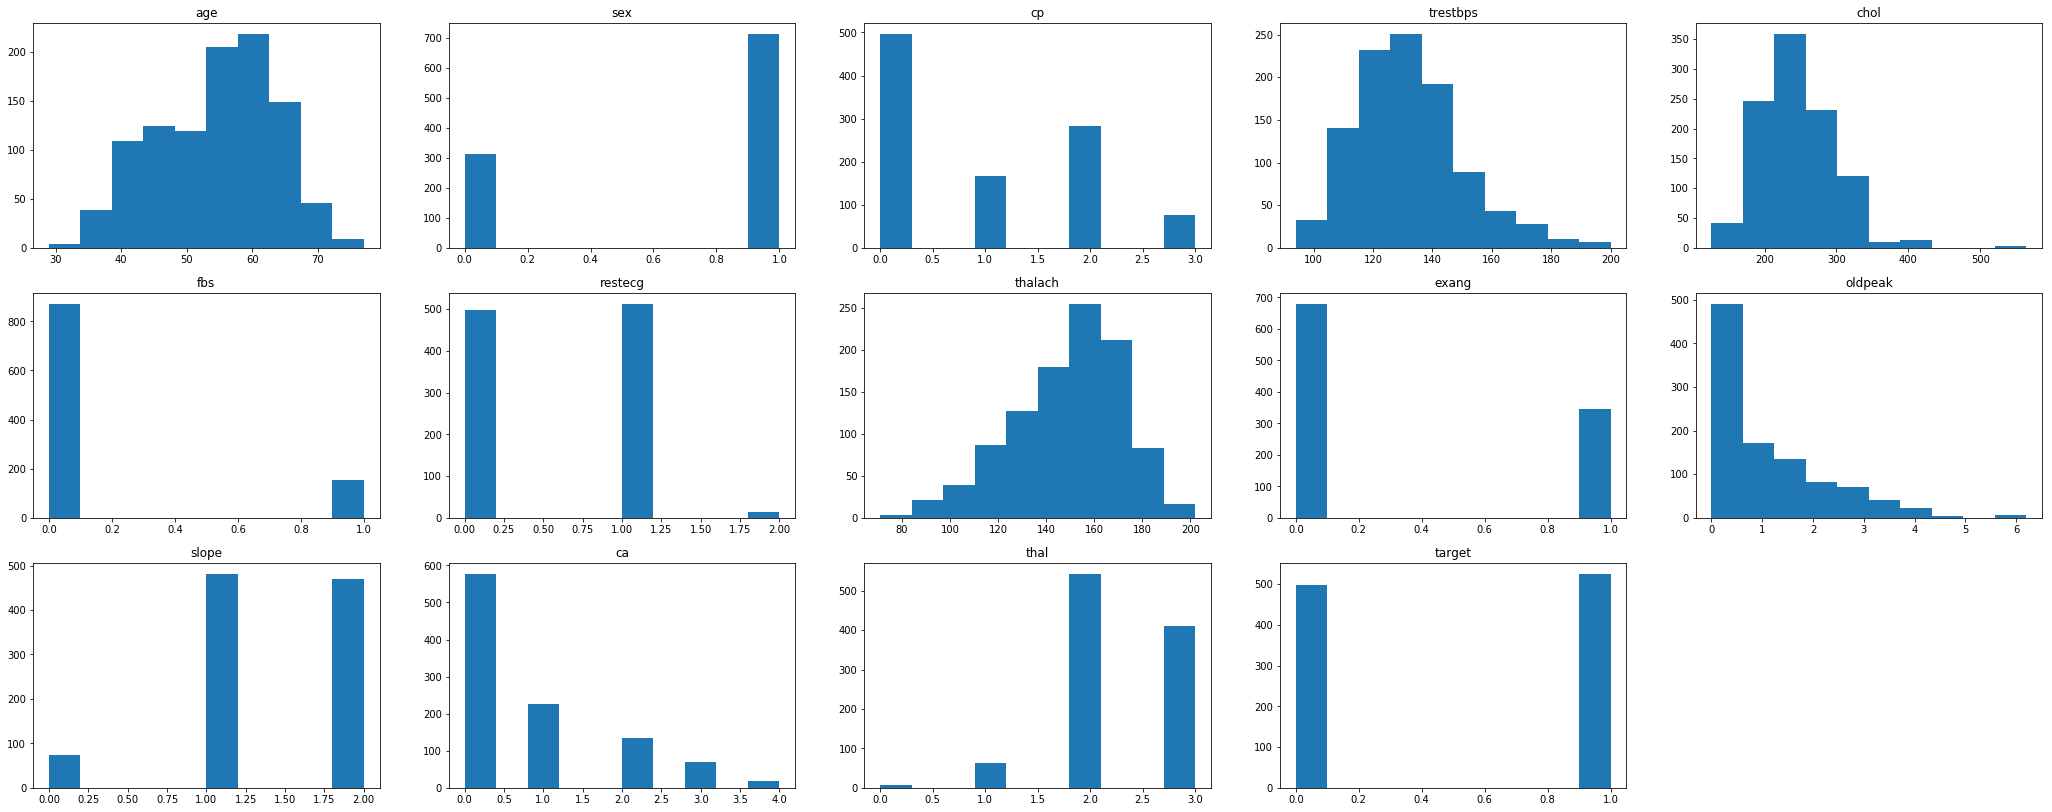

In [23]:
#Histograms for each numerical feature
import itertools 
import matplotlib.gridspec as gridspec

label = df.columns.tolist() # 18 
clf_list = list(range(0, 18) ) 

fig = plt.figure(figsize=(36, 24)) 
gs = gridspec.GridSpec(5, 5) 
grid = itertools.product([0,1, 2, 3, 4 ],repeat=2)

print (grid)

for clf, label, grd in zip(clf_list, label, grid):

 #plt.subplot(3, 3, 3)
 ax = plt.subplot(gs[grd[0], grd[1]])
 plt.hist(df[label])
 plt.title(label)

plt.show()


## These are histograms for each of the numerical fields in the data set.

In [24]:
#Preparing training and test sets. 
X = df.drop('target', 1)
y = df['target']

# Create training and test sets.
offset = int(X.shape[0] * 0.8)

# Put 80% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

print(X_train.head())

print(y_train.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  
0   2     3  
1   0     3  
2   0     3  
3   1     3  
4   3     2  
0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64


In [25]:
#Ridge Regression
regr1 = linear_model.LinearRegression()
regr1.fit(X_train, y_train)
print('R-squared simple Ridge Regression model:')
print(regr1.score(X_train, y_train))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)


R-squared simple Ridge Regression model:
0.5407524529252543


## Ridge regression has a 54% fit of the data.

In [26]:
#Lasso Regression
lass = linear_model.Lasso(alpha=.35)
lassfit = lass.fit(X_train, y_train)
print('R² for the Lasso Regression model:')
print(lass.score(X_train, y_train))

origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model:')
print(origparams)


R² for the Lasso Regression model:
0.20928389033040784

Parameter estimates for the model:
[-0.         -0.          0.         -0.00220705 -0.00061856 -0.
  0.          0.00865541 -0.         -0.          0.         -0.
 -0.         -0.3263478 ]


## The Lasso Regression has a nearly 21% fit of the data.

In [27]:
#Pipeline Construction.
#Created an SelectKBest object to select features with three best ANOVA F-Values
anova = SelectKBest(f_classif, k=3)
svm = SVC(kernel='rbf')
anova_svm = make_pipeline(anova, svm)

#Fitting & Cross-Validation.
anova_svm.fit(X_train,y_train)
scores = cross_val_score(anova_svm, X_test, y_test, cv=5)

#De-Masking Selected Features.
features = anova.get_support(indices=True)
feature_names = list(X_test.columns)
selected_features = []
for feature in features:
    selected_features.append(feature_names[feature])

#Printing Outcomes.
print('ANOVA Cross-Validation Scores: {}\n'.format(scores))
print('ANOVA Cross-Validation Score Averaged Across Folds: {:.2%}.\n'.format(scores.mean()))
print('Selected Features: {}\n'.format(selected_features))

ANOVA Cross-Validation Scores: [0.69047619 0.73170732 0.70731707 0.68292683 0.775     ]

ANOVA Cross-Validation Score Averaged Across Folds: 71.75%.

Selected Features: ['cp', 'exang', 'oldpeak']



## The Support Vector Machines model shows a 71.75% fit to the data.

Weak learner 0 R^2: -2.468939877125331
Weak learner 20 R^2: -0.05397616746412126
Weak learner 40 R^2: -0.017998362907154508
Weak learner 60 R^2: -0.01805663112426692
Weak learner 80 R^2: -0.027935908754259442
Weak learner 100 R^2: -0.023169191628083396


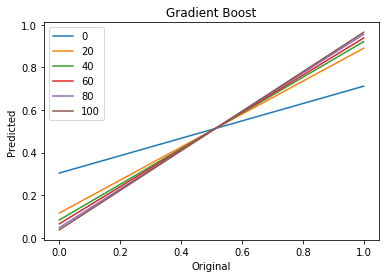

Overall R^2:
0.9792370863222567


In [28]:
#Gradient Boosting
#Defined outcome and predictors.
y = df['target'].values
X = df.loc[:, ~df.columns.isin(['target'])]

#Store values from loops.
preds = pd.DataFrame()
labels = []

uniquex = df['target'].unique()

#Iterate through decision trees, each time using the residuals
#from the previous tree as the inputs.
for m in range(0, 101):
    
    #Initialize and fit the tree. Set the max depth to 2.
    decision_tree = tree.DecisionTreeRegressor(max_depth=2)
    decision_tree.fit(X,y)
    
    #Get and store predicted values.
    pred = decision_tree.predict(X)
    preds['pred{}'.format(m)] = pred
    
    #Residuals.
    y = y - pred

    #Output every 20 iterations.
    if m % 20 == 0:
        print('Weak learner {} R^2: {}'.format(m, decision_tree.score(X, y)))
        labels = labels + [m]
        bestpred = preds.sum(axis=1)
        plt.plot(uniquex, np.poly1d(np.polyfit(df['target'], bestpred, 1))(uniquex))
       
plt.legend(labels)
plt.xlabel('Original')
plt.ylabel('Predicted')
plt.title('Gradient Boost')
plt.show()
predicted = preds.sum(axis=1)

print('Overall R^2:')
print(np.corrcoef(df['target'], predicted)[0, 1])

## Gradient Boosting shows a nearly 98% fit to the data. This is the best performing model in the entire analysis.

In [29]:
#500 iterations, 2-deep trees, and set the loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

#Initialize and fit the model
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)


#Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)
print(table_train)


col_0     0    1  All
target               
0       393    0  393
1         2  425  427
All     395  425  820


In [30]:
#Training and Test Sets Accuracy
train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))

Training set accuracy:
Percent Type I errors: 0.0
Percent Type II errors: 0.0024390243902439024

Test set accuracy:
Percent Type I errors: 0.014634146341463415
Percent Type II errors: 0.01951219512195122


## These are the standard errors for the training and testing data.

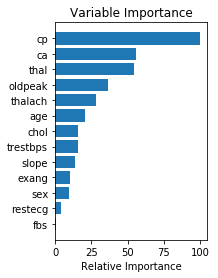

In [31]:
#Feature Importance relative to Target
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Here are the variables with the highest correlation to the 'target' variable.

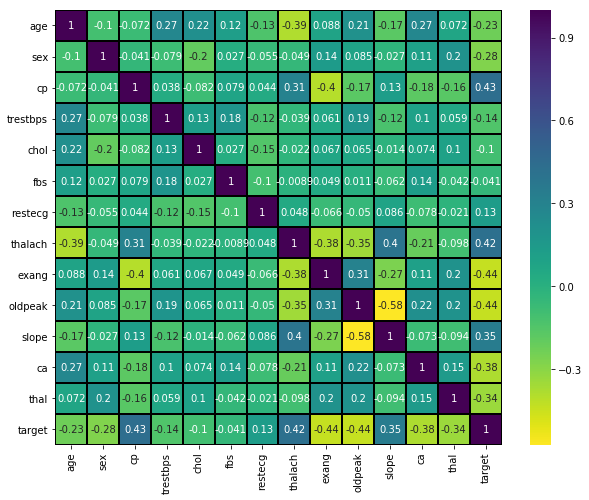

In [32]:
#Correlation Heat Map
plt.figure(figsize=(10,8))
correlations = df.corr()
matrix = sns.heatmap(correlations,annot=True,linecolor='k',linewidth=1,cmap='viridis_r')

## A heatmap with correlations between the each of the numerical fields. Chest Pain, Maximum Heart Rate Acheived, and the Slope of Peak Exercise have the highest correlation to the Target variable.

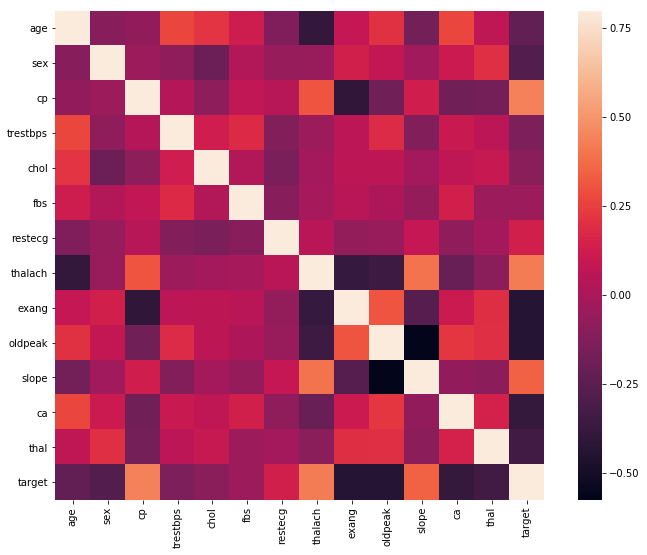

In [33]:
# Make the correlation matrix
cor = df.corr()

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 9))

# Heatmap using seaborn
sns.heatmap(cor, vmax=.8, square=True)
plt.show()


## This heatmap shows the same correlations but without the numerical representations.

In [34]:
# Statsmodel logistic regression
# Declare predictors.
y_statsmod = df['target']
x_statsmod = df.iloc[:,:-1]

# The Statsmodels formulation requires a column with constant value 1 that will act as the intercept.
x_statsmod['intercept'] = 1 

# Declare and fit the model.
logit = sm.Logit(y_statsmod, x_statsmod)
result = logit.fit()

# Lots of information about the model and its coefficients, but the
# accuracy rate for predictions is missing.
print(result.summary())
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.350681
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.4938
Time:                        01:12:10   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
                                        LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.

## Statsmodel logistic regression shows the coefficient, standard error along with the z and p scores associated with each variable. The Pseudo-R-squared is 49.3% after 7 interations with chest pain, resting electrocardiographic results, the slope of peak exercise, sex, exercise induced angina, and  have high coefficients which means there is a strong correlation.


In [35]:
param_grid = {
                 'n_estimators': [5, 10, 15, 20],
                 'max_depth': [2, 5, 7, 9]
             }
from sklearn.model_selection import GridSearchCV

grid_clf = GridSearchCV(clf, param_grid, cv=10)
grid_clf.fit(X_train, y_train)
print(result.summary())
print(result.summary2())

                           Logit Regression Results                           
Dep. Variable:                 target   No. Observations:                 1025
Model:                          Logit   Df Residuals:                     1011
Method:                           MLE   Df Model:                           13
Date:                Tue, 09 Jun 2020   Pseudo R-squ.:                  0.4938
Time:                        01:12:18   Log-Likelihood:                -359.45
converged:                       True   LL-Null:                       -710.12
                                        LLR p-value:                1.777e-141
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0082      0.013     -0.650      0.516      -0.033       0.017
sex           -1.8465      0.257     -7.197      0.000      -2.349      -1.344
cp             0.8546      0.100      8.516      0.0

## Performed a GridSearch Classifier to see if there were any differences from the Logit Statsmodel. There are no differences.

In [36]:
# Import Perceptron.
from sklearn.linear_model import Perceptron

# Establish X and Y.
#X = test_data[['test', 'project']]
#Y = test_data['pass']

# Establish Perceptron Model.
# 10,000 iterations to ensure accuracy since data is non-normalized.
perceptron = Perceptron(n_iter=10000)

# Fit Perceptron.
perceptron.fit(X, Y)

# Get Parameters.
print('Score: ' + str(perceptron.score(X, Y)))

Score: 0.871219512195122


## The perceptron score is approximately .8712.

In [37]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout
import pandas as pd
import numpy as np


from sklearn.model_selection import train_test_split

print(tf.__version__)

import matplotlib.pyplot as plt

Using TensorFlow backend.


2.0.0


In [38]:
#Training data for Tensorflow model
y =df['target'].values

x= df.drop(['target'], axis = 1).values

X_train, X_test, y_train, y_test = train_test_split( x, y, test_size=0.33, random_state=42)



early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)


model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(2, activation='softmax')
])
# 


model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [39]:
model.fit(X_train, y_train, epochs=100, callbacks=[early_stop])

model.evaluate(X_test,  y_test, verbose=2)


Train on 686 samples
Epoch 1/100
686/686 [==============================] - 1s 2ms/sample - loss: 14.4733 - accuracy: 0.4913
Epoch 2/100
686/686 [==============================] - 0s 95us/sample - loss: 9.9253 - accuracy: 0.5233
Epoch 3/100
686/686 [==============================] - 0s 77us/sample - loss: 8.0149 - accuracy: 0.5408
Epoch 4/100
686/686 [==============================] - 0s 80us/sample - loss: 7.0864 - accuracy: 0.5583
Epoch 5/100
686/686 [==============================] - 0s 76us/sample - loss: 6.5601 - accuracy: 0.6020
Epoch 6/100
686/686 [==============================] - 0s 76us/sample - loss: 5.4732 - accuracy: 0.6224
Epoch 7/100
686/686 [==============================] - 0s 76us/sample - loss: 5.0033 - accuracy: 0.6137
Epoch 8/100
686/686 [==============================] - 0s 82us/sample - loss: 4.6191 - accuracy: 0.5860
Epoch 9/100
686/686 [==============================] - 0s 80us/sample - loss: 4.2847 - accuracy: 0.6137
Epoch 10/100
686/686 [=====================

Epoch 27/100
686/686 [==============================] - 0s 86us/sample - loss: 0.6338 - accuracy: 0.7259
Epoch 28/100
686/686 [==============================] - 0s 74us/sample - loss: 0.5981 - accuracy: 0.7478
Epoch 29/100
686/686 [==============================] - 0s 149us/sample - loss: 0.5812 - accuracy: 0.7536
Epoch 30/100
686/686 [==============================] - 0s 112us/sample - loss: 0.5493 - accuracy: 0.7843
Epoch 31/100
686/686 [==============================] - 0s 76us/sample - loss: 0.5533 - accuracy: 0.7507
Epoch 32/100
686/686 [==============================] - 0s 74us/sample - loss: 0.5050 - accuracy: 0.7872
Epoch 33/100
686/686 [==============================] - 0s 74us/sample - loss: 0.5035 - accuracy: 0.8076
Epoch 34/100
686/686 [==============================] - 0s 74us/sample - loss: 0.4691 - accuracy: 0.7930
Epoch 35/100
686/686 [==============================] - 0s 111us/sample - loss: 0.5352 - accuracy: 0.7668
Epoch 36/100
686/686 [==============================

Epoch 53/100
686/686 [==============================] - 0s 64us/sample - loss: 0.4306 - accuracy: 0.8134
Epoch 54/100
686/686 [==============================] - 0s 67us/sample - loss: 0.4253 - accuracy: 0.8003
Epoch 55/100
686/686 [==============================] - 0s 71us/sample - loss: 0.4039 - accuracy: 0.8163
Epoch 56/100
686/686 [==============================] - 0s 105us/sample - loss: 0.4499 - accuracy: 0.7945
Epoch 57/100
686/686 [==============================] - 0s 89us/sample - loss: 0.4642 - accuracy: 0.7974
Epoch 58/100
686/686 [==============================] - 0s 64us/sample - loss: 0.4067 - accuracy: 0.8280
Epoch 59/100
686/686 [==============================] - 0s 71us/sample - loss: 0.4276 - accuracy: 0.7959
Epoch 60/100
686/686 [==============================] - 0s 70us/sample - loss: 0.4193 - accuracy: 0.8294
Epoch 61/100
686/686 [==============================] - 0s 63us/sample - loss: 0.4493 - accuracy: 0.7901
Epoch 62/100
686/686 [==============================] 

Epoch 79/100
686/686 [==============================] - 0s 67us/sample - loss: 0.3835 - accuracy: 0.8426
Epoch 80/100
686/686 [==============================] - 0s 66us/sample - loss: 0.3930 - accuracy: 0.8309
Epoch 81/100
686/686 [==============================] - 0s 73us/sample - loss: 0.3798 - accuracy: 0.8426
Epoch 82/100
686/686 [==============================] - 0s 68us/sample - loss: 0.3850 - accuracy: 0.8105
Epoch 83/100
686/686 [==============================] - 0s 68us/sample - loss: 0.3810 - accuracy: 0.8324
Epoch 84/100
686/686 [==============================] - 0s 71us/sample - loss: 0.3626 - accuracy: 0.8499
Epoch 85/100
686/686 [==============================] - 0s 66us/sample - loss: 0.3777 - accuracy: 0.8163
Epoch 86/100
686/686 [==============================] - 0s 79us/sample - loss: 0.3538 - accuracy: 0.8426
Epoch 87/100
686/686 [==============================] - 0s 68us/sample - loss: 0.3874 - accuracy: 0.8236
Epoch 88/100
686/686 [==============================] -

[0.38732152509126694, 0.8023599]

## Tensorflow model performs at around 84% accuracy.

In [40]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import accuracy_score


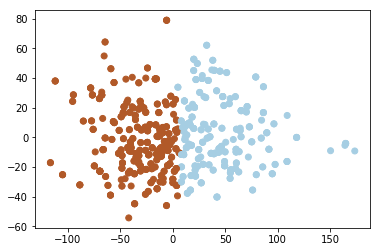

col_0    0    1
row_0          
0      170  117
1      158  241
accuracy score 0.5991253644314869.


In [41]:
# Normalize the data.
X_norm = normalize(X_train)

# Reduce it to two components.
X_train = PCA(2).fit_transform(X_train)

# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_train)

# Plot the solution.
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
#print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_train))

print ("accuracy score {}.".format(  accuracy_score(y_train, y_pred) ) )

## The accuracy of the Kmeans model is about 60% accurate. 